In [1]:
import pandas as pd

In [ ]:
# https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

In [5]:
train_csv = pd.read_csv('/Users/kassandramadulka/Downloads/forest-cover-type-prediction/train.csv')
test_csv = pd.read_csv('/Users/kassandramadulka/Downloads/forest-cover-type-prediction/test.csv')
train_csv.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [13]:
train_csv.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [14]:
train_csv.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [19]:
train_csv.groupby('Cover_Type').count()['Id']

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Id, dtype: int64

In [20]:
print(train_csv.shape)
print(train_csv.drop_duplicates().shape)

(15120, 56)
(15120, 56)


# EDA

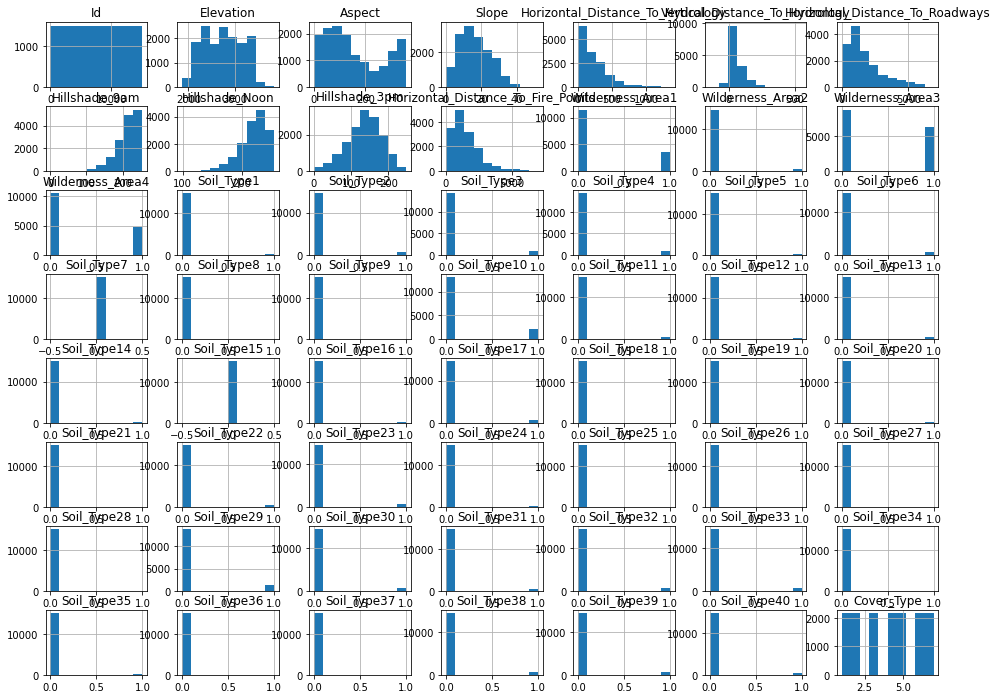

In [15]:
train_csv.hist(figsize=(16, 12));

In [27]:
train_csv.var() # soil type 7 does not vary at all
# train_csv['Soil_Type9'].unique()

array([0, 1])

In [29]:
train_csv.describe()
# looks like some outliers may want to exclude

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [39]:
import numpy as np
from scipy import stats

train_no_outliers = train_csv[np.abs(stats.zscore(train_csv))<3]
train_no_outliers.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15081.000000,14835.000000,14907.000000,14965.000000,14960.000000,14991.000000,15120.000000,...,14430.0,14504.0,15098.0,15018.0,15110.0,15086.0,14392.0,14463.0,14661.0,15120.000000
mean,7560.50000,2749.322553,156.676653,16.425370,212.195079,47.832763,1669.786635,213.843115,219.675672,135.091997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
std,4364.91237,417.678187,110.085801,8.329983,181.174116,54.709350,1257.954287,28.614053,21.535693,45.895189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-123.000000,0.000000,122.000000,151.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,60.000000,4.000000,752.000000,197.000000,207.000000,106.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,175.000000,31.000000,1301.000000,220.000000,223.000000,138.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,319.000000,76.000000,2230.000000,235.000000,235.000000,167.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000
max,15120.00000,3849.000000,360.000000,41.000000,854.000000,234.000000,5689.000000,254.000000,254.000000,248.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_df = train_csv.copy()
X = add_constant(vif_df[x_features])
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                                   0.000000
Elevation                              11.891031
Aspect                                  1.958109
Slope                                   9.362101
Horizontal_Distance_To_Hydrology        2.457547
Vertical_Distance_To_Hydrology          2.247702
Horizontal_Distance_To_Roadways         2.085147
Hillshade_9am                         121.143727
Hillshade_Noon                         46.372734
Hillshade_3pm                         183.315228
Horizontal_Distance_To_Fire_Points      1.738847
Wilderness_Area1                             inf
Wilderness_Area2                             inf
Wilderness_Area3                             inf
Wilderness_Area4                             inf
Soil_Type1                                   inf
Soil_Type2                                   inf
Soil_Type3                                   inf
Soil_Type4                                   inf
Soil_Type5                                   inf
Soil_Type6          

In [40]:
train_csv.corr().style.background_gradient(cmap='coolwarm')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,nan,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,nan,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,nan,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,nan,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,nan,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,nan,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,nan,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,nan,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,nan,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,nan,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,nan,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,nan,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659

In [49]:
# split data into train test set
from sklearn.model_selection import train_test_split

# highly correlated features to remove: 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Elevation'
# Remove 'Soil_Type15' and 'Soil_Type7' because no variance
x_features = ['Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways',  'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'
       ] # 'Cover_Type'


x_train, x_test, y_train, y_test = train_test_split(train_csv[x_features], train_csv['Cover_Type'], test_size=0.20, random_state=0) # , stratify=df_encoded_['Approved']

x_train


,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
7366,294,9,295,29,1471,860,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4936,110,26,90,24,764,1527,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5777,265,6,30,4,4288,4195,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10724,121,10,0,0,722,1142,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9412,3,19,636,80,4160,3546,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,72,10,0,0,886,983,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3264,39,28,30,-3,564,636,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9845,158,27,120,-37,3221,1140,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
10799,80,35,85,33,1677,1084,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Build Different Models

In [ ]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.svm import SVC
# from sklearn.preprocessing import (
#     OneHotEncoder, PowerTransformer, StandardScaler
#   )

# # Don't have to set `multi_class` argument if used with OVOClassifier
# ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

# ovo.fit(X_train, y_train)
# OneVsOneClassifier(estimator=GaussianProcessClassifier())

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )
from sklearn.multiclass import OneVsRestClassifier

# Build categorical preprocessor
# categorical_cols = X.select_dtypes(include="object").columns.to_list()
# categorical_pipe = make_pipeline(
#     OneHotEncoder(sparse=False, handle_unknown="ignore")
#   )

# Build numeric processor
 
to_log = ["Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 'Horizontal_Distance_To_Fire_Points']
to_scale = ['Aspect', 'Slope',
        'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        #("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            OneVsRestClassifier(RandomForestClassifier(max_depth=90, n_estimators=1600)),
        ),
    ]
)
# Fit
_ = pipeline.fit(x_train, y_train)

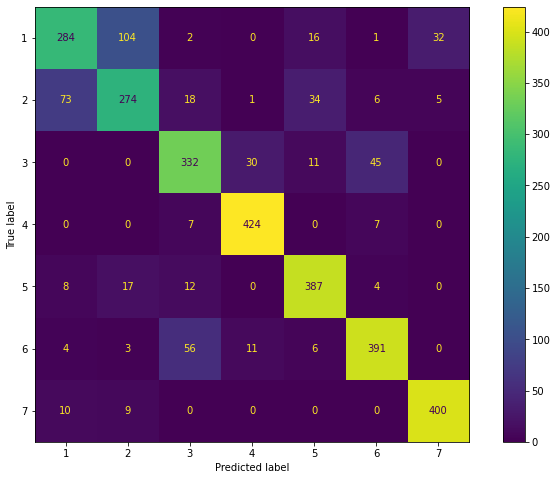

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_pred = pipeline.predict(x_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

In [88]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = pipeline.predict_proba(x_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
  )
# 0.9618308112981542

0.9752980855574078

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipeline.predict(x_test)))

              precision    recall  f1-score   support

           1       0.75      0.65      0.69       439
           2       0.67      0.67      0.67       411
           3       0.78      0.79      0.79       418
           4       0.91      0.97      0.94       438
           5       0.85      0.90      0.88       428
           6       0.86      0.83      0.85       471
           7       0.92      0.95      0.93       419

    accuracy                           0.82      3024
   macro avg       0.82      0.82      0.82      3024
weighted avg       0.82      0.82      0.82      3024



In [90]:
# GENERATE ROC_AUC SCORE FOR 'IDEAL' CLASS DIAMONDS

# Find the index of Ideal class diamonds
idx = np.where(pipeline.classes_ == 2)[0][0]

# Don't have to set multiclass and average params
roc_auc_score(y_test == 2, y_pred_probs[:, idx])


0.9343545234709849

## Tune Parameters

In [82]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4]

# param_grid = {
#     "base__n_estimators": n_estimators,
#     "base__max_depth": max_depth,
#     "base__min_samples_split": min_samples_split,
#     "base__min_samples_leaf": min_samples_leaf,
# }

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}

In [85]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hrs = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(), #pipeline,
    param_distributions=param_grid,
    cv=3,
    n_candidates="exhaust",
    factor=5,
    n_jobs=-1,
)

# Fit
_ = hrs.fit(x_train, y_train)

# Score
best_estimator = hrs.best_estimator_
print(best_estimator)

RandomForestClassifier(max_depth=90, n_estimators=1600)


## KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:

power_scaler = PowerTransformer()
s_scaler = StandardScaler()
x_scaled_scaler = s_scaler.fit_transform(x_train[to_scale])
x_scaled_power = power_scaler.fit_transform(x_train[to_log])

x_train_scaled = pd.DataFrame(x_scaled_scaler, columns=to_scale)
x_train_power = pd.DataFrame(x_scaled_power, columns=to_log)

x_train_df = pd.concat([x_train_scaled, x_train_power], ignore_index=False, sort=False, axis=1)


# TEST
x_scaled_scaler = s_scaler.transform(x_test[to_scale])
x_scaled_power = power_scaler.transform(x_test[to_log])

x_test_scaled = pd.DataFrame(x_scaled_scaler, columns=to_scale)
x_test_power = pd.DataFrame(x_scaled_power, columns=to_log)

x_test_df = pd.concat([x_test_scaled, x_test_power], ignore_index=False, sort=False, axis=1)



from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train_df, y_train)
print(gridsearch.best_params_)

# test_preds_grid = gridsearch.predict(X_test)
# test_mse = mean_squared_error(y_test, test_preds_grid)
# test_rmse = sqrt(test_mse)
# test_rmse

{'n_neighbors': 1, 'weights': 'uniform'}


In [123]:
to_log = ["Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 'Horizontal_Distance_To_Fire_Points']
to_scale = ['Aspect', 'Slope',
        'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        #("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "model",
            KNeighborsClassifier(n_neighbors=5, weights='distance'),
        ),
    ]
)
# Fit
_ = pipeline.fit(x_train, y_train)

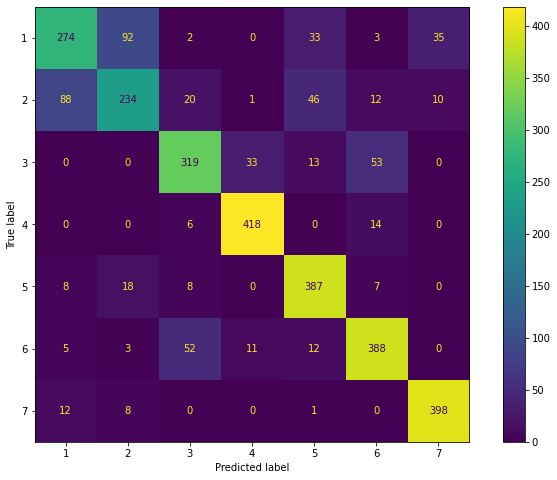

In [124]:
y_pred = pipeline.predict(x_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

In [125]:
# Generate membership scores with .predict_proba
y_pred_probs = pipeline.predict_proba(x_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
  )
# 0.9618308112981542

0.9514722644567689

In [126]:
print(classification_report(y_test, pipeline.predict(x_test)))

              precision    recall  f1-score   support

           1       0.71      0.62      0.66       439
           2       0.66      0.57      0.61       411
           3       0.78      0.76      0.77       418
           4       0.90      0.95      0.93       438
           5       0.79      0.90      0.84       428
           6       0.81      0.82      0.82       471
           7       0.90      0.95      0.92       419

    accuracy                           0.80      3024
   macro avg       0.79      0.80      0.79      3024
weighted avg       0.79      0.80      0.80      3024

